In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mpcol

In [8]:
def d_p_set(p, s):
    x,y = np.where(s)
    dist = (x-p[0])**2 + (y-p[1])**2
    am = np.argmin(dist)
    return np.sqrt(np.min(dist)), [x[am], y[am]]

def d_set(sA, sB):
    x,y = np.where(sA)
    best = np.inf
    for xp, yp in zip(x,y):
        d, pB = d_p_set([xp,yp], sB)
        if d < best:
            best_pA = [xp,yp]
            best_pB = pB
            best = d
    return best, [best_pA, best_pB]

def process_image(path, earth_centre, shadow, inside = False, earth_radius = 42):
    img = mpimg.imread(path)
    plt.figure()
    plt.imshow(img)
    brightness_threshold = 40
    shape_detect = mpcol.rgb_to_hsv(img)[...,2] > brightness_threshold
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    earth_detect = shape_detect & (np.sqrt((x-earth_centre[0])**2 + (y-earth_centre[1])**2) <= earth_radius)
    moon_detect = shape_detect & ~earth_detect
    plt.figure()
    plt.imshow(earth_detect, cmap = 'gray')
    plt.figure()
    plt.imshow(moon_detect, cmap = 'gray')
    dist_earth_moon, dist_earth_moon_arg = d_set(earth_detect, moon_detect)
    plt.figure()
    plt.imshow(shape_detect, cmap = 'gray')
    plt.plot([dist_earth_moon_arg[0][1], dist_earth_moon_arg[1][1]],
             [dist_earth_moon_arg[0][0], dist_earth_moon_arg[1][0]], 'o-', color = 'red')
    #x,y = np.where(moon_detect) if not inside else np.where(~moon_detect)
    #dist_px = np.sqrt((x-moon_detect.shape[0]/2)**2 + (y-moon_detect.shape[1]/2)**2)
    #min_dist_px = np.min(dist_px)
    #plt.figure()
    #plt.imshow(moon_detect, cmap = 'gray')
    #plt.plot([moon_detect.shape[1]/2, y[np.argmin(dist_px)]], [moon_detect.shape[0]/2, x[np.argmin(dist_px)]], 'o-', color = 'red')
    # Data taken from [astrometry.net processed image](http://nova.astrometry.net/user_images/2878505#original)
    resolution_arcsec_px = 214/2
    resolution_deg_px = resolution_arcsec_px/3600
    #moon_separation = min_dist_px * resolution_deg_px
    #if inside:
    #    moon_separation = -moon_separation
    #print('Moon seperation:', moon_separation, 'deg')
    print('Earth-Moon separation: {:.2f} deg'.format(dist_earth_moon * resolution_deg_px))
    print('Shadow-image centre separation: {:.2f} deg'.format(\
                np.sqrt((shadow[1]-img.shape[0]/2)**2+(shadow[0]-img.shape[1]/2)**2) * resolution_deg_px))

Earth-Moon separation: 1.32 deg
Shadow-image centre separation: 3.50 deg


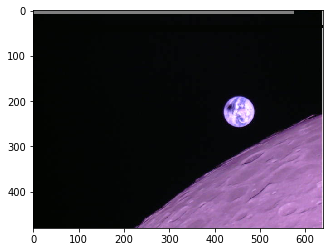

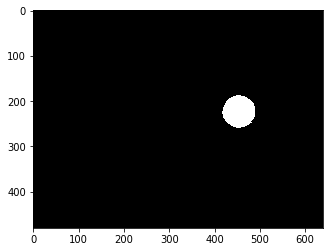

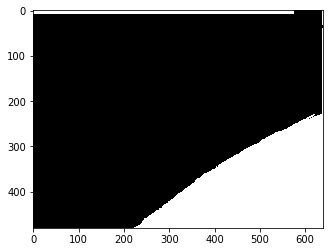

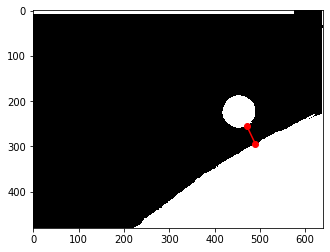

In [9]:
# 0xE2
process_image('6aa3fac3-8793-4f23-9893-a6a9fbbad28b.jpeg', earth_centre = (456, 224), shadow = (435,214))

Earth-Moon separation: 1.06 deg
Shadow-image centre separation: 3.39 deg


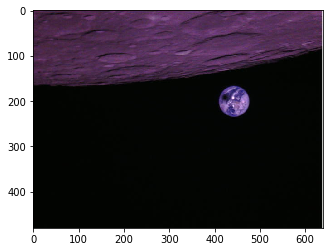

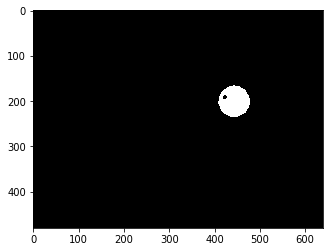

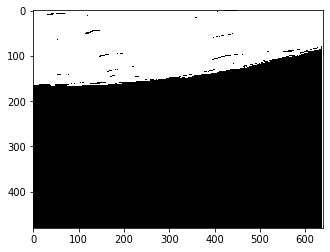

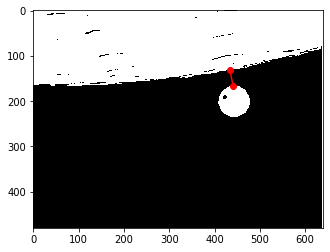

In [10]:
# 0xE5
process_image('094a055f-fadf-4199-a77a-c9f98dd2ed29.jpeg', earth_centre = (444,201), shadow = (424,193))

Earth-Moon separation: 4.36 deg
Shadow-image centre separation: 3.33 deg


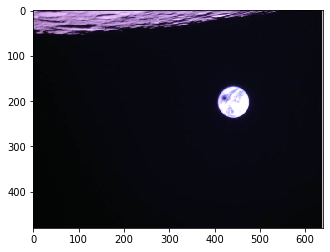

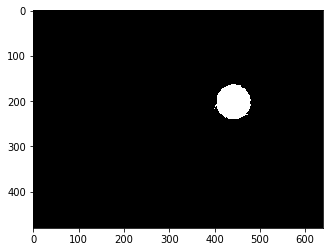

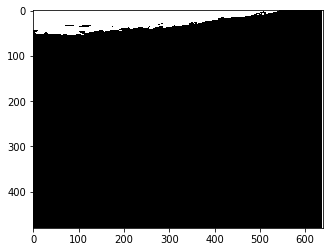

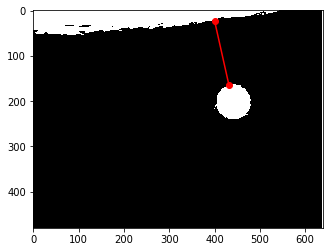

In [11]:
# 0xE6
process_image('9e176a1b-fde6-46d7-b7ea-04244d3270d6.jpeg', earth_centre = (444,201), shadow = (422, 194), earth_radius = 55)

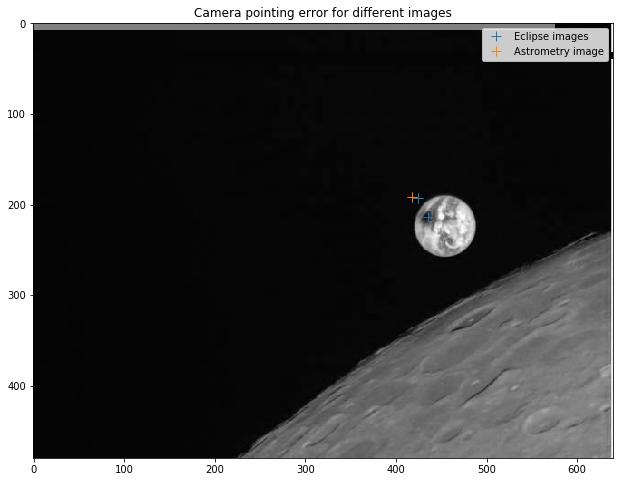

In [56]:
plt.figure(figsize = (12,8))
img = mpimg.imread('6aa3fac3-8793-4f23-9893-a6a9fbbad28b.jpeg')
plt.imshow(img[:,:,1], cmap = 'gray')
off_axis_eclipse = np.array([(435,214), (424,193), (424,193)])
off_axis_stars = np.array(2*(np.array((368.65, 216.02))-np.array((320,240)))+np.array((320,240)))
plt.plot(off_axis[:,0], off_axis[:,1], '+', markersize = 10, label = 'Eclipse images')
plt.plot([off_axis_stars[0]], [off_axis_stars[1]], '+', markersize = 10, label = 'Astrometry image')
#plt.xlim((0,640))
#plt.ylim((-480,0))
plt.legend()
plt.title('Camera pointing error for different images');